## Loading 2D fields into yt 

`yt_xarray` can also load in 2D fields from xarray into a yt dataset. To do so, all you have to do is provide a selection dictionary that will reduce your chosen field down to 2D. 

First, let's import and create a test dataset with dimensions that yt will not know:

In [1]:
import xarray as xr
import yt_xarray
import yt
import numpy as np
from yt_xarray.sample_data import load_random_xr_data

fields = {'temp': ('x', 'y', 'z'), 
          'precip': ('x', 'y'),
          'precip_t': ('x', 'y', 'time')}
dims = {'x': (0,1,15), 'y': (0, 1, 10), 'z': (0, 1, 15), 'time': (0, 1, 5)}
ds = load_random_xr_data(fields, dims, length_unit='m')
ds

<xarray.Dataset>
Dimensions:   (x: 15, y: 10, z: 15, time: 5)
Coordinates:
  * x         (x) float64 0.0 0.07143 0.1429 0.2143 ... 0.7857 0.8571 0.9286 1.0
  * y         (y) float64 0.0 0.1111 0.2222 0.3333 ... 0.6667 0.7778 0.8889 1.0
  * z         (z) float64 0.0 0.07143 0.1429 0.2143 ... 0.7857 0.8571 0.9286 1.0
  * time      (time) float64 0.0 0.25 0.5 0.75 1.0
Data variables:
    temp      (x, y, z) float64 0.326 0.4565 0.3212 ... 0.5516 0.8988 0.3817
    precip    (x, y) float64 0.2222 0.153 0.6116 0.9373 ... 0.2619 0.4644 0.4776
    precip_t  (x, y, time) float64 0.06265 0.5747 0.3099 ... 0.6112 0.5412
Attributes:
    geospatial_vertical_units:  m

loading the `"temp"` field without any selection dictionary will load the full 3D field: 

In [2]:
yt_ds = ds.yt.load_grid(fields=["temp",], length_unit = 'km')

yt_xarray : [INFO ] 2023-02-06 12:24:49,168:  Inferred geometry type is cartesian. To override, use ds.yt.set_geometry
yt_xarray : [INFO ] 2023-02-06 12:24:49,170:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2023-02-06 12:24:49,170:      Cartesian geometry on uniform grid: yt_xarray will not interpolate.
yt : [INFO     ] 2023-02-06 12:24:49,261 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-02-06 12:24:49,262 Parameters: domain_dimensions         = [15 10 15]
yt : [INFO     ] 2023-02-06 12:24:49,263 Parameters: domain_left_edge          = [-0.03571429 -0.05555556 -0.03571429]
yt : [INFO     ] 2023-02-06 12:24:49,264 Parameters: domain_right_edge         = [1.03571429 1.05555556 1.03571429]
yt : [INFO     ] 2023-02-06 12:24:49,265 Parameters: cosmological_simulation   = 0


In [3]:
print(yt_ds.domain_width)

[1.07142857 1.11111111 1.07142857] code_length


loading in the `"precip"` field, which is two dimensional, which load in the field with a dummy 3rd dimension:

In [4]:
yt_ds = ds.yt.load_grid(fields=["precip",], length_unit = 'km')

yt_xarray : [INFO ] 2023-02-06 12:24:49,284:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2023-02-06 12:24:49,285:      Cartesian geometry on uniform grid: yt_xarray will not interpolate.
yt : [INFO     ] 2023-02-06 12:24:49,367 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-02-06 12:24:49,368 Parameters: domain_dimensions         = [15 10  1]
yt : [INFO     ] 2023-02-06 12:24:49,369 Parameters: domain_left_edge          = [-0.03571429 -0.05555556 -0.5       ]
yt : [INFO     ] 2023-02-06 12:24:49,371 Parameters: domain_right_edge         = [1.03571429 1.05555556 0.5       ]
yt : [INFO     ] 2023-02-06 12:24:49,372 Parameters: cosmological_simulation   = 0


In [5]:
print(yt_ds.domain_width)

[1.07142857 1.11111111 1.        ] code_length


yt : [INFO     ] 2023-02-06 12:24:49,512 xlim = -0.035714 1.035714
yt : [INFO     ] 2023-02-06 12:24:49,513 ylim = -0.055556 1.055556
yt : [INFO     ] 2023-02-06 12:24:49,513 xlim = -0.035714 1.035714
yt : [INFO     ] 2023-02-06 12:24:49,514 ylim = -0.055556 1.055556
yt : [INFO     ] 2023-02-06 12:24:49,518 Making a fixed resolution buffer of (('stream', 'precip')) 800 by 800



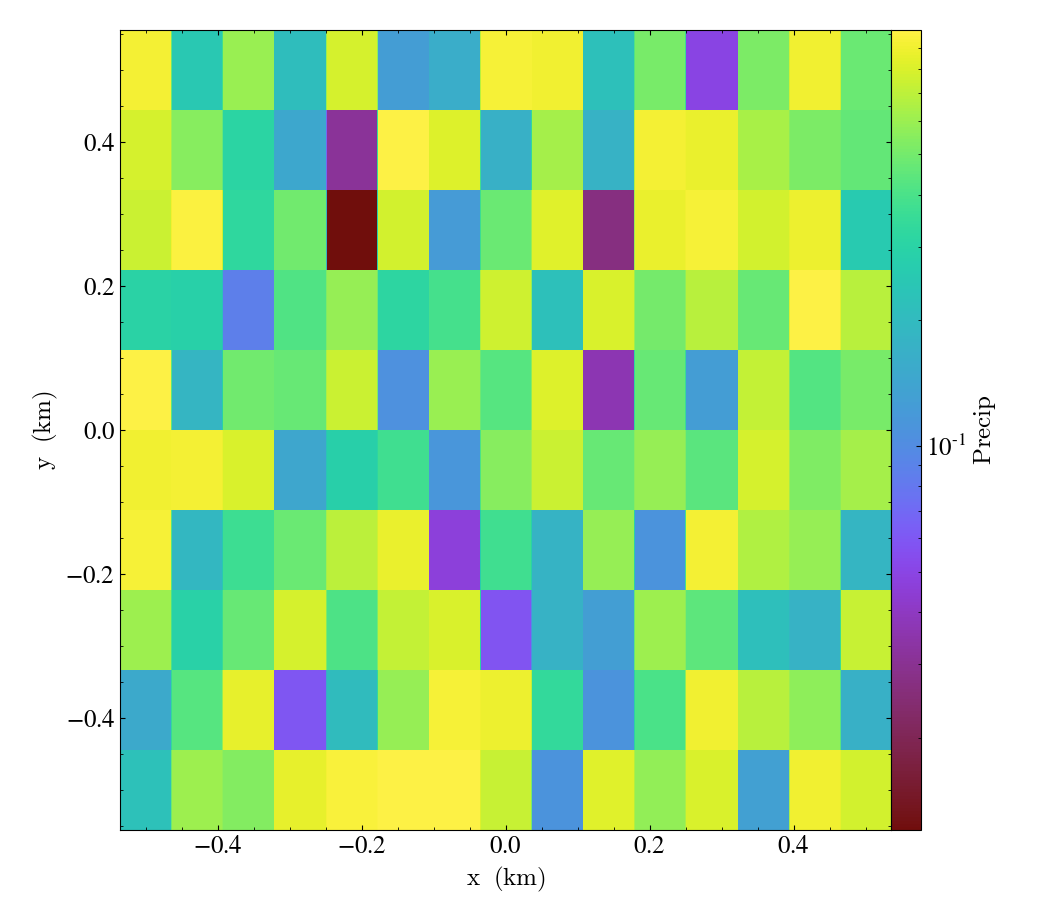

In [6]:
yt.SlicePlot(yt_ds, "z", ("stream", "precip"))

Finally, you can also provide a selection dictionary to reduce a field to 2D. For example, you can load select a timestep to load for `"precip_t"` with:

In [7]:
yt_ds = ds.yt.load_grid(fields=["precip_t",], length_unit = 'km', geometry="cartesian", sel_dict={'time':0})

yt_xarray : [INFO ] 2023-02-06 12:24:50,271:  Attempting to detect if yt_xarray will require field interpolation:
yt_xarray : [INFO ] 2023-02-06 12:24:50,273:      Cartesian geometry on uniform grid: yt_xarray will not interpolate.
yt : [INFO     ] 2023-02-06 12:24:50,340 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-02-06 12:24:50,341 Parameters: domain_dimensions         = [15 10  1]
yt : [INFO     ] 2023-02-06 12:24:50,343 Parameters: domain_left_edge          = [-0.03571429 -0.05555556 -0.5       ]
yt : [INFO     ] 2023-02-06 12:24:50,344 Parameters: domain_right_edge         = [1.03571429 1.05555556 0.5       ]
yt : [INFO     ] 2023-02-06 12:24:50,345 Parameters: cosmological_simulation   = 0


In [8]:
print(yt_ds.domain_width)

[1.07142857 1.11111111 1.        ] code_length


yt : [INFO     ] 2023-02-06 12:24:50,453 xlim = -0.035714 1.035714
yt : [INFO     ] 2023-02-06 12:24:50,454 ylim = -0.055556 1.055556
yt : [INFO     ] 2023-02-06 12:24:50,455 xlim = -0.035714 1.035714
yt : [INFO     ] 2023-02-06 12:24:50,455 ylim = -0.055556 1.055556
yt : [INFO     ] 2023-02-06 12:24:50,460 Making a fixed resolution buffer of (('stream', 'precip_t')) 800 by 800



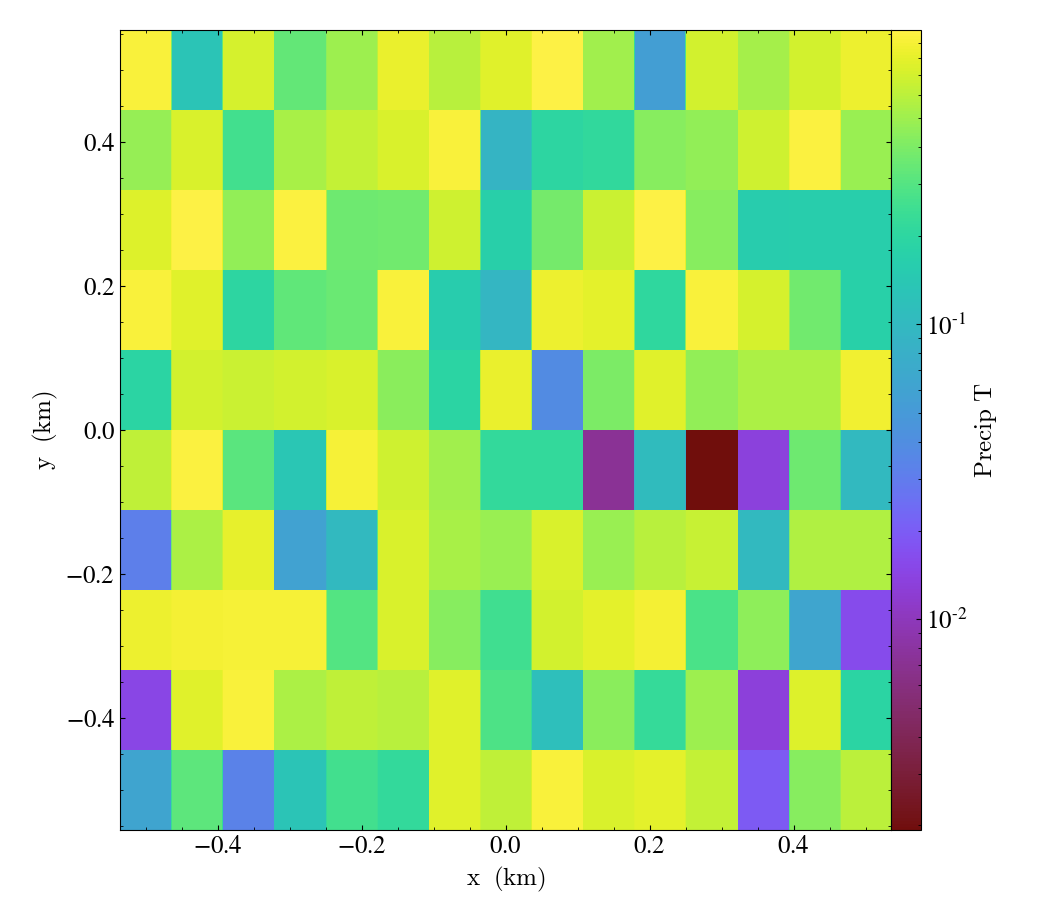

In [9]:
yt.SlicePlot(yt_ds, "z", ("stream", "precip_t"))